In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from shapely.geometry import Point
import random

In [34]:
travel_chain=pd.read_csv('../data/travel-chain-all.csv')

In [35]:
travel_chain.head(5)

,who,date,seiqd,mode,poi_o,poi_d,org_chess_x,org_chess_y,dst_chess_x,dst_chess_y,...,lambda_d,phi_d,migrt,pre_chess_x,pre_chess_y,post_chess_x,post_chess_y,home_distance,trip_distance,weekend
0,126272,20190101,1,1,0,3,34.0,109.0,20.0,105.0,...,113.798765,22.681593,20190803,34.0,110.0,56.0,149.0,14.866069,14.560220,False
1,126272,20190101,2,1,3,14,20.0,105.0,57.0,147.0,...,113.889444,22.773309,20190803,34.0,110.0,56.0,149.0,43.566042,55.973208,False
2,126272,20190101,3,1,14,11,57.0,147.0,71.0,111.0,...,113.923893,22.695130,20190803,34.0,110.0,56.0,149.0,37.013511,38.626416,False
3,126272,20190101,4,1,11,7,71.0,111.0,40.0,108.0,...,113.848284,22.687043,20190803,34.0,110.0,56.0,149.0,6.324555,31.144823,False
4,126272,20190102,1,1,2,9,39.0,68.0,30.0,103.0,...,113.823771,22.677155,20190803,34.0,110.0,56.0,149.0,8.062258,36.138622,False


In [36]:
unique_whos = travel_chain['who'].unique()
# random_who = random.choice(unique_whos)
random_who = 77678983
one_df = travel_chain[travel_chain['who'] == random_who]
df = one_df.dropna()
print(df)

             who      date  seiqd  mode  poi_o  poi_d  org_chess_x  \
489334  77678983  20190101      1     1      2     12        144.0   
489335  77678983  20190101      2     1     12      1        144.0   
489336  77678983  20190102      1     1      2      0        144.0   
489337  77678983  20190102      2     1      0      2         73.0   
489338  77678983  20190103      1     1     19      0         86.0   
...          ...       ...    ...   ...    ...    ...          ...   
490213  77678983  20191230      2     4      1      0         73.0   
490214  77678983  20191231      1     1      0      2        151.0   
490215  77678983  20191231      2     1      2      5        136.0   
490216  77678983  20191231      3     1      5      2        137.0   
490217  77678983  20191231      4     1      2      0        136.0   

        org_chess_y  dst_chess_x  dst_chess_y  ...    lambda_d      phi_d  \
489334         58.0        144.0         49.0  ...  114.101268  22.556263   
48933

# 获得每一行对应的格网id

In [37]:
df['geometry_o'] = [Point(xy) for xy in zip(df['lambda_o'], df['phi_o'])]
df['geometry_d'] = [Point(xy) for xy in zip(df['lambda_d'], df['phi_d'])]
grid_gdf = gpd.read_file("../data/shenzhen_grid/shenzhen_grid.shp")

geo_df_o = gpd.GeoDataFrame(df, geometry='geometry_o')
result_o = gpd.sjoin(geo_df_o, grid_gdf, how="left", op="within")

geo_df_d = gpd.GeoDataFrame(df, geometry='geometry_d')
result_d = gpd.sjoin(geo_df_d, grid_gdf, how="left", op="within")

d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\301\AppData\Local\Temp\ipykernel_23112\2667824445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry_o'] = [Point(xy) for xy in zip(df['lambda_o'], df['phi_o'])]
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\301\AppData\Local\Temp\ipyke

In [38]:
df['grid_id_o'] = result_o['fnid']  # 请使用实际的列名
df['grid_id_d'] = result_d['fnid']  # 同样使用实际的列名

C:\Users\301\AppData\Local\Temp\ipykernel_23112\2162810959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grid_id_o'] = result_o['fnid']  # 请使用实际的列名
C:\Users\301\AppData\Local\Temp\ipykernel_23112\2162810959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grid_id_d'] = result_d['fnid']  # 同样使用实际的列名


In [39]:
columns_to_drop = [
    'org_chess_x', 'org_chess_y', 'dst_chess_x',
    'dst_chess_y', 'pre_chess_x', 'pre_chess_y', 'post_chess_x', 'post_chess_y',
    'geometry_o', 'geometry_d'
]

# 使用 drop 方法删除这些列
df = df.drop(columns=columns_to_drop)

In [48]:
one_df=df.dropna()
one_df.to_csv('../data/one_travel_chain.csv',index=False)

In [2]:
one_df=pd.read_csv('../data/one_travel_chain.csv')

In [3]:
# 根据'date'在'migrt'之前的行划分为一个DataFrame
df_before_migrt = one_df[one_df['date'] < one_df['migrt']]
df_after_migrt = one_df[one_df['date']>one_df['migrt']]

print("DataFrame with 'date' before 'migrt':")
print(len(df_before_migrt))
print("DataFrame with 'date' after 'migrt':")
print(len(df_after_migrt))

DataFrame with 'date' before 'migrt':
477
DataFrame with 'date' after 'migrt':
374


# traj visualization

C:\Users\301\AppData\Local\Temp\ipykernel_23112\2355259160.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_travel_chain = gdf_travel_chain.append({
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\301\AppData\Local\Temp\ipykernel_23112\2355259160.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_travel_chain = gdf_travel_chain.append({
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_ar

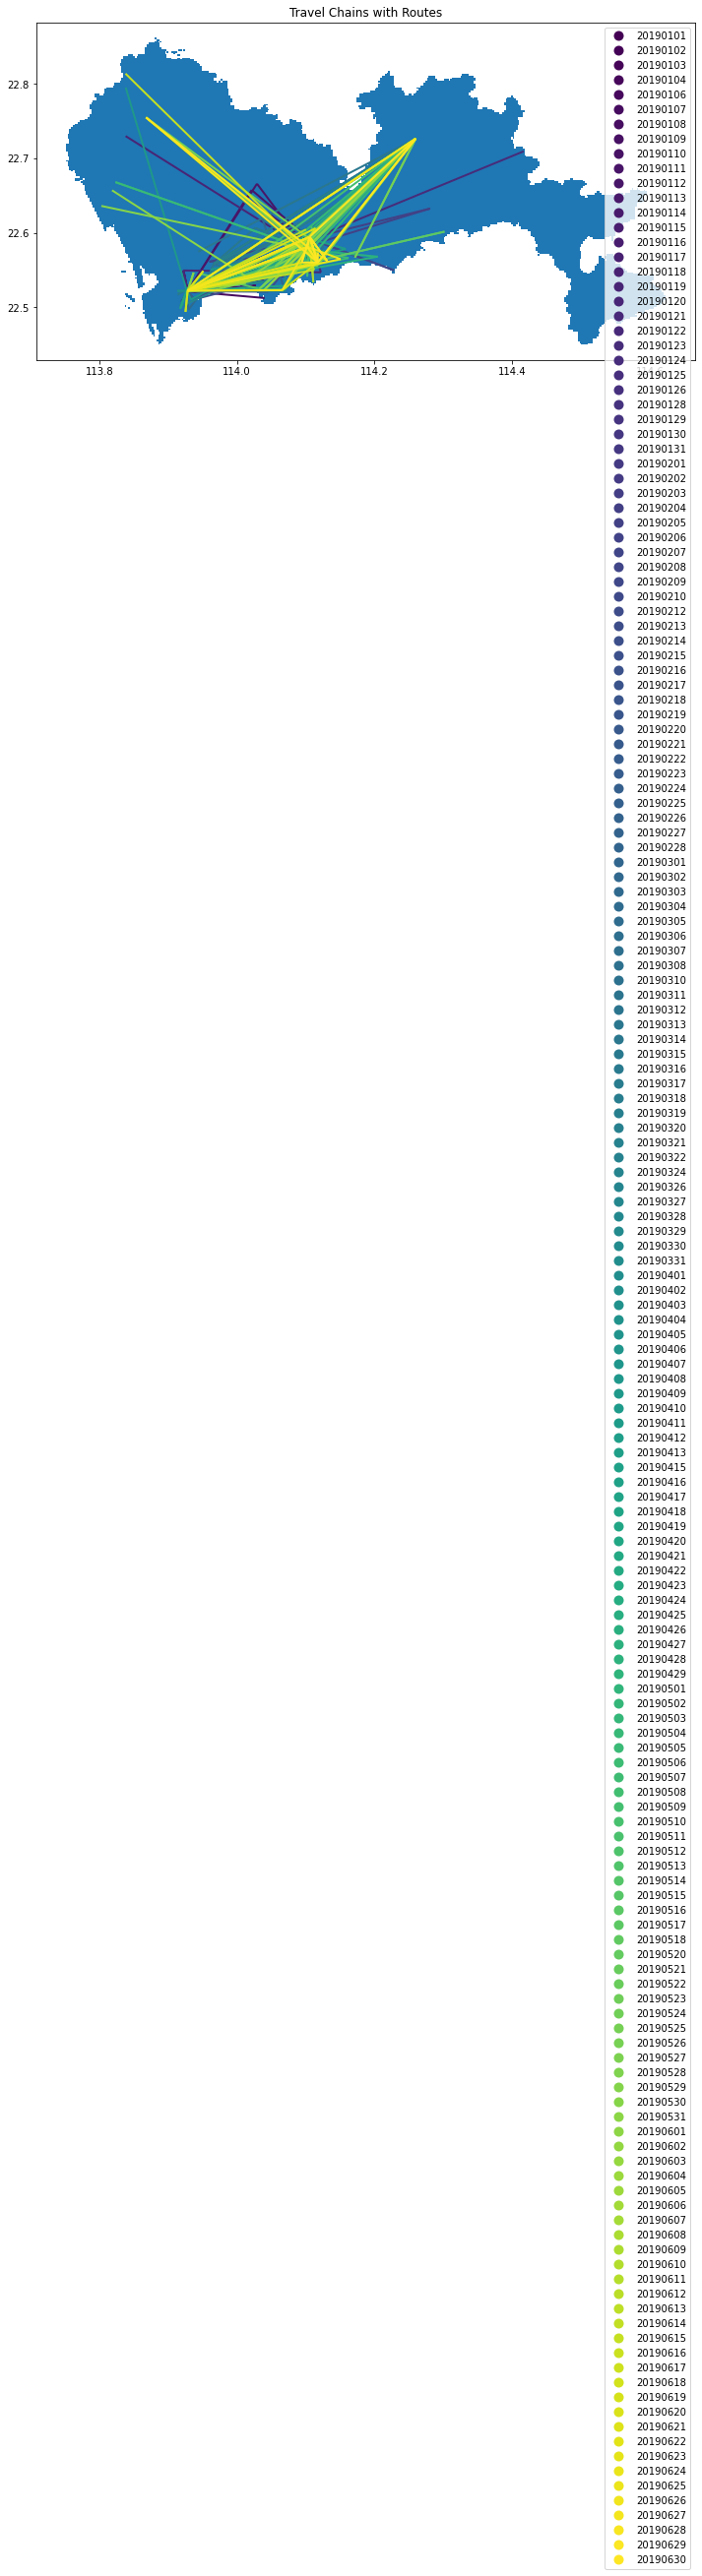

In [45]:
# 读取出行链数据
travel_chain = df_before_migrt

# 创建一个空的GeoDataFrame来存储出行链
gdf_travel_chain = gpd.GeoDataFrame(columns=['who', 'date', 'seiqd', 'mode', 'lambda_o', 'phi_o', 'lambda_d', 'phi_d', 'migrt', 'geometry'])
idx=0
for date, group in travel_chain.groupby('date'):
    idx =idx+1

    for index, row in group.iterrows():
        # 提取起点和终点坐标
        start_point = (row['lambda_o'], row['phi_o'])
        end_point = (row['lambda_d'], row['phi_d'])

        # 创建出行链线路
        line = LineString([start_point, end_point])

        # 将线路添加到GeoDataFrame
        gdf_travel_chain = gdf_travel_chain.append({
            'who': row['who'],
            'date': row['date'],
            'seiqd': row['seiqd'],
            'mode': row['mode'],
            'poi_o': row['poi_o'],
            'poi_d': row['poi_d'],
            'lambda_o': row['lambda_o'],
            'phi_o': row['phi_o'],
            'lambda_d': row['lambda_d'],
            'phi_d': row['phi_d'],
            'migrt': row['migrt'],
            'geometry': line,
            'idx': idx  # 将索引列添加到GeoDataFrame
        }, ignore_index=True)

gdf_travel_chain.crs = "EPSG:4326"
gdf_travel_chain.to_file('../data/shp/before_migrt.shp')

fig, ax = plt.subplots(figsize=(12, 8))

gdf_travel_chain.plot(ax=ax, column='date', cmap='viridis', linewidth=2, legend=True)
grid_gdf.plot(ax=ax)
plt.title('Travel Chains with Routes')

plt.show()

C:\Users\301\AppData\Local\Temp\ipykernel_23112\3752797075.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_travel_chain = gdf_travel_chain.append({
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\301\AppData\Local\Temp\ipykernel_23112\3752797075.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_travel_chain = gdf_travel_chain.append({
d:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_ar

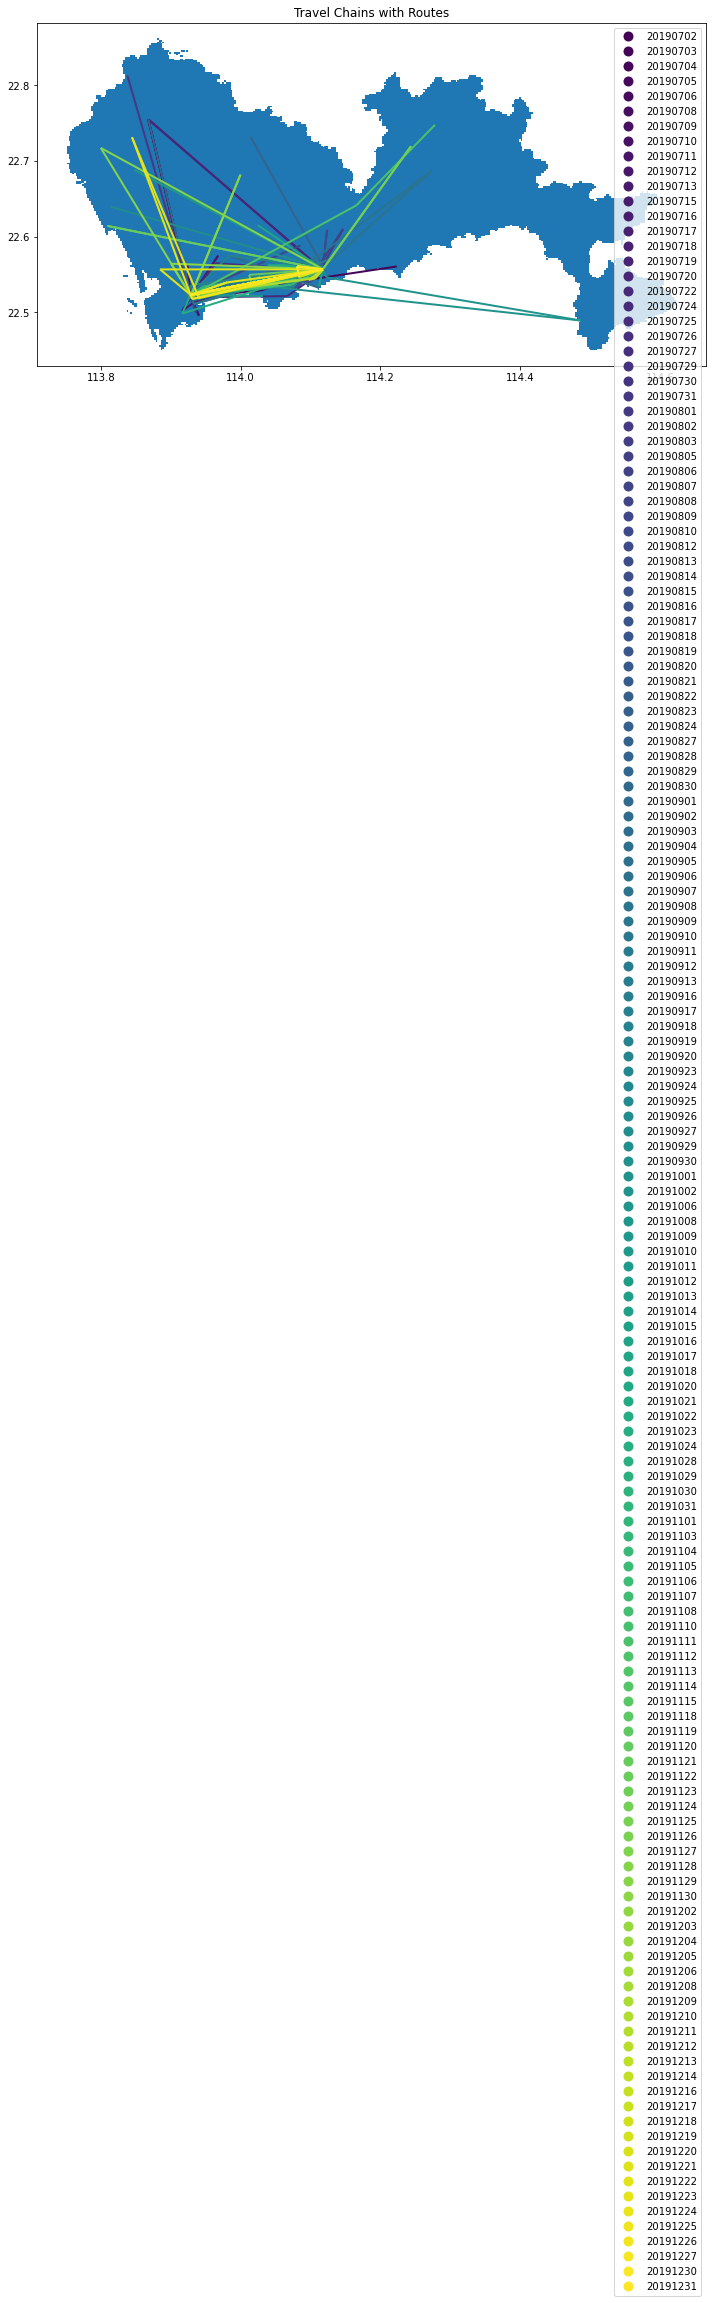

In [46]:
# 读取出行链数据
travel_chain = df_after_migrt

# 创建一个空的GeoDataFrame来存储出行链
gdf_travel_chain = gpd.GeoDataFrame(columns=['who', 'date', 'seiqd', 'mode', 'poi_o', 'poi_d', 'lambda_o', 'phi_o', 'lambda_d', 'phi_d', 'migrt', 'geometry'])
idx=0
for date, group in travel_chain.groupby('date'):
    idx=idx+1
    for index, row in group.iterrows():
        # 提取起点和终点坐标
        start_point = (row['lambda_o'], row['phi_o'])
        end_point = (row['lambda_d'], row['phi_d'])

        # 创建出行链线路
        line = LineString([start_point, end_point])

        # 将线路添加到GeoDataFrame
        gdf_travel_chain = gdf_travel_chain.append({
            'who': row['who'],
            'date': row['date'],
            'seiqd': row['seiqd'],
            'mode': row['mode'],
            'poi_o': row['poi_o'],
            'poi_d': row['poi_d'],
            'lambda_o': row['lambda_o'],
            'phi_o': row['phi_o'],
            'lambda_d': row['lambda_d'],
            'phi_d': row['phi_d'],
            'migrt': row['migrt'],
            'geometry': line,
            'idx': idx  # 将索引列添加到GeoDataFrame
        }, ignore_index=True)

gdf_travel_chain.crs = "EPSG:4326"
gdf_travel_chain.to_file('../data/shp/after_migrt.shp')

fig, ax = plt.subplots(figsize=(12, 8))

gdf_travel_chain.plot(ax=ax, column='date', cmap='viridis', linewidth=2, legend=True)
grid_gdf.plot(ax=ax)
plt.title('Travel Chains with Routes')

plt.show()

# home distance

In [7]:
home_distance_before = df_before_migrt[['grid_id_d', 'home_distance']].drop_duplicates(subset=['grid_id_d'])
home_distance_before

,grid_id_d,home_distance
0,17637.0,16.031220
1,22994.0,1.414214
2,11854.0,78.790862
3,20850.0,7.071068
5,16557.0,21.470911
...,...,...
438,25496.0,7.211103
440,16147.0,66.098411
456,18728.0,23.021729
467,18363.0,17.804494


In [8]:
home_distance_after = df_after_migrt[['grid_id_d', 'home_distance']].drop_duplicates(subset=['grid_id_d'])
home_distance_after

,grid_id_d,home_distance
478,11497.0,79.831072
479,12966.0,39.217343
480,17287.0,1.000000
482,49314.0,136.124943
484,18401.0,43.046487
...,...,...
826,18343.0,15.132746
827,15845.0,14.866069
830,17548.0,96.000000
832,11502.0,74.953319
